In [1]:
%load_ext autoreload
%autoreload 2

from model import LitS4Model
from data import LitDataModule
from plotting import make_bias, make_resolution
import torch
from torch.utils.data import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import tqdm
import numpy as np

/n/holylabs/LABS/iaifi_lab/Users/creissel/miniforge3/envs/ssm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
CHECKPOINT = '/n/home03/creissel/neutrino_project/runs/input_I_Q__output_energy_pitchangle__d_model_10_n_layers_6__fullsim/lightning_logs/7se3axjd/checkpoints/epoch=29-step=71400.ckpt'

In [12]:
model = LitS4Model.load_from_checkpoint(CHECKPOINT)
model = model.to(device)
model = model.eval()

In [13]:
#dataset = LitDataModule.load_from_checkpoint(CHECKPOINT, inputs=['output_ts_I'], variables=model.variables)
dataset = LitDataModule.load_from_checkpoint(CHECKPOINT)

In [14]:
true = []
pred = []

for ts,var in dataset.test_dataloader():
    with torch.no_grad():
        pred.append(model(ts.to(device)).cpu().numpy())
        true.append(var.numpy()) 

In [15]:
#true = np.concatenate(true)
#pred = np.concatenate(pred)

true = np.concatenate(true, axis=0)
pred = np.concatenate(pred, axis=0)

In [16]:
# undo the normalization
pred_post = pred * dataset.stds + dataset.mu
true_post = true * dataset.stds + dataset.mu

In [17]:
model.variables

['energy_eV', 'pitch_angle_deg']

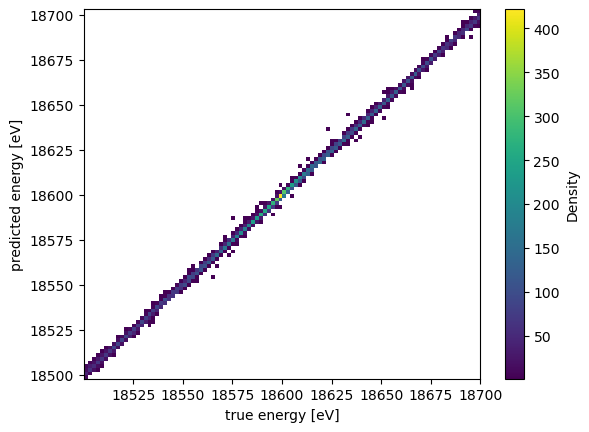

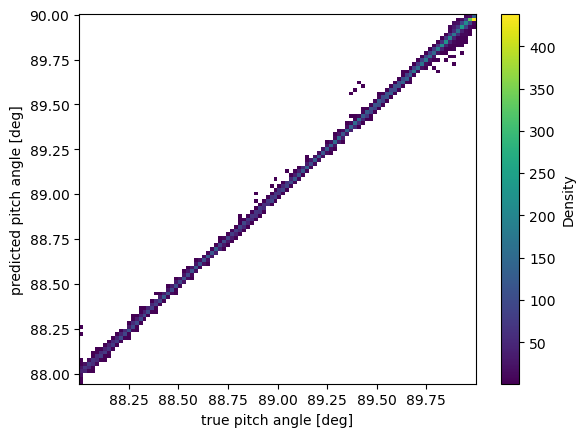

In [18]:
for idx, var in enumerate(model.variables):
    fig = make_bias(idx, var, true_post, pred_post)

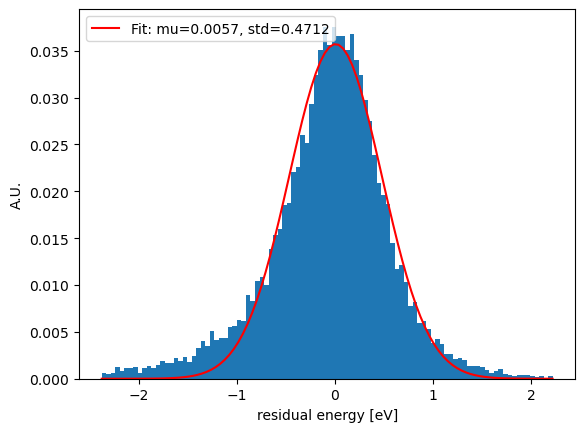

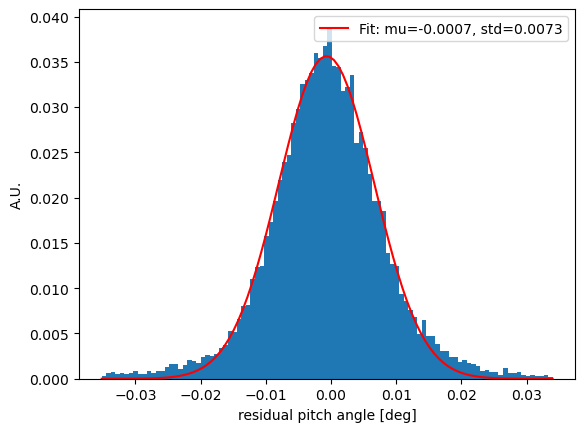

In [19]:
import matplotlib.pyplot as plt
for idx, var in enumerate(model.variables):
    fig = make_resolution(idx, var, true_post, pred_post)